# **This notebook is for feature weight training.**
**- The best solution is from Random Forest**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
trans_network = pd.read_csv('transaction_network_data_all.csv', sep=',')
trans_network.head()

,Unnamed: 0,itemID_i,itemID_j,weight,language,author,main_topic,interest_age,title,publisher_cluster,author_cluster,number_pages
0,0,14576,17731,6,1.0,1.0,0.175094,0.000,1.335705,1.000000,0.460938,0.448052
1,1,14576,4753,1,1.0,0.0,0.000000,0.025,0.000000,1.000000,0.628093,0.819805
2,2,14576,50523,2,1.0,0.0,0.000000,-0.925,0.000000,1.000000,0.424975,0.619713
3,3,14576,6540,1,1.0,0.0,0.000000,-0.025,0.000000,0.761851,1.000000,0.688312
4,4,14576,72731,1,1.0,0.0,0.000000,0.025,0.000000,0.761851,0.460938,0.146193


In [ ]:
network_data = trans_network.copy()
print(len(network_data))

303666


In [ ]:
network_data = network_data.drop(columns=['Unnamed: 0'])
#remove data which main topic is nan
network_data.dropna(subset = ["main_topic"], inplace=True)
print(len(network_data))
network_data.head()

301349


,itemID_i,itemID_j,weight,language,author,main_topic,interest_age,title,publisher_cluster,author_cluster,number_pages
0,14576,17731,6,1.0,1.0,0.175094,0.000,1.335705,1.000000,0.460938,0.448052
1,14576,4753,1,1.0,0.0,0.000000,0.025,0.000000,1.000000,0.628093,0.819805
2,14576,50523,2,1.0,0.0,0.000000,-0.925,0.000000,1.000000,0.424975,0.619713
3,14576,6540,1,1.0,0.0,0.000000,-0.025,0.000000,0.761851,1.000000,0.688312
4,14576,72731,1,1.0,0.0,0.000000,0.025,0.000000,0.761851,0.460938,0.146193


In [ ]:
#calculate age closeness
network_data['interest_age'] = 1 - abs(network_data['interest_age'])
network_data.head()

,itemID_i,itemID_j,weight,language,author,main_topic,interest_age,title,publisher_cluster,author_cluster,number_pages
0,14576,17731,6,1.0,1.0,0.175094,1.000,1.335705,1.000000,0.460938,0.448052
1,14576,4753,1,1.0,0.0,0.000000,0.975,0.000000,1.000000,0.628093,0.819805
2,14576,50523,2,1.0,0.0,0.000000,0.075,0.000000,1.000000,0.424975,0.619713
3,14576,6540,1,1.0,0.0,0.000000,0.975,0.000000,0.761851,1.000000,0.688312
4,14576,72731,1,1.0,0.0,0.000000,0.975,0.000000,0.761851,0.460938,0.146193


In [ ]:
#remove title outlier 
print(network_data.loc[network_data['title'] > 50])
network_data = network_data.loc[network_data['title'] < 50]
len(network_data)

        itemID_i  itemID_j  weight  language  author  main_topic  \
228842      9231     44709       1       1.0     0.0    0.405403   

        interest_age      title  publisher_cluster  author_cluster  \
228842          0.05  75.604972           0.761851        0.390816   

        number_pages  
228842      0.315622  


301348

In [ ]:
#remove weight outlier
print(network_data.loc[network_data['weight'] > 200])

      itemID_i  itemID_j  weight  language  author  main_topic  interest_age  \
3890     46998      2253     243       1.0     1.0    0.256717           1.0   

      title  publisher_cluster  author_cluster  number_pages  
3890    0.0                1.0             1.0      0.616883  


In [ ]:
network_data = network_data.loc[network_data['weight'] < 200]
len(network_data)

301347

In [ ]:
#title normalization
network_data['title'] = (network_data['title'] - network_data['title'].min()) / (network_data['title'].max() - network_data['title'].min())
network_data.head()

,itemID_i,itemID_j,weight,language,author,main_topic,interest_age,title,publisher_cluster,author_cluster,number_pages
0,14576,17731,6,1.0,1.0,0.175094,1.000,0.03094,1.000000,0.460938,0.448052
1,14576,4753,1,1.0,0.0,0.000000,0.975,0.00000,1.000000,0.628093,0.819805
2,14576,50523,2,1.0,0.0,0.000000,0.075,0.00000,1.000000,0.424975,0.619713
3,14576,6540,1,1.0,0.0,0.000000,0.975,0.00000,0.761851,1.000000,0.688312
4,14576,72731,1,1.0,0.0,0.000000,0.975,0.00000,0.761851,0.460938,0.146193


In [ ]:
network_data.describe()

,itemID_i,itemID_j,weight,language,author,main_topic,interest_age,title,publisher_cluster,author_cluster,number_pages
count,301347.000000,301347.000000,301347.000000,301347.000000,301347.000000,301347.000000,301347.000000,301347.000000,301347.000000,301347.000000,301347.000000
mean,39132.884386,39426.727042,1.408479,0.914202,0.070065,0.332994,0.867336,0.004201,0.837461,0.386780,0.642298
std,22643.635041,22515.516846,2.470508,0.280066,0.255258,0.363276,0.296496,0.019684,0.308123,0.299241,0.263539
min,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006530,0.000000
25%,19458.000000,20354.000000,1.000000,1.000000,0.000000,0.000000,0.950000,0.000000,0.761851,0.153597,0.466857
50%,38902.000000,39394.000000,1.000000,1.000000,0.000000,0.211067,0.975000,0.000000,1.000000,0.340933,0.692225
75%,58765.000000,58691.000000,1.000000,1.000000,0.000000,0.518656,1.000000,0.000000,1.000000,0.509925,0.863636
max,79066.000000,79066.000000,191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
network_data['weight'].value_counts()

1      256592
2       26161
3        7716
4        3610
5        2020
        ...  
95          1
96          1
97          1
98          1
191         1
Name: weight, Length: 115, dtype: int64

In [ ]:
network_data_1 = network_data[network_data['weight'] == 1]
network_data_2 = network_data[network_data['weight'] == 2]
network_data_3 = network_data[network_data['weight'] == 3]
network_data_4 = network_data[network_data['weight'] == 4]
network_data_5 = network_data[network_data['weight'] == 5]
network_data_6 = network_data[network_data['weight'] == 6]
network_data_7 = network_data[network_data['weight'] == 7]
network_data_8 = network_data[network_data['weight'] == 8]
network_data_9 = network_data[network_data['weight'] == 9]
network_data_10 = network_data[network_data['weight'] == 10]
network_data_11 = network_data[network_data['weight'] == 11]
network_data_12 = network_data[network_data['weight'] == 12]
network_data_13 = network_data[network_data['weight'] == 13]
network_data_14 = network_data[network_data['weight'] == 14]
network_data_15 = network_data[network_data['weight'] == 15]
network_data_16 = network_data[network_data['weight'] == 16]
network_data_17 = network_data[network_data['weight'] == 17]
network_data_18 = network_data[network_data['weight'] == 18]
network_data_19 = network_data[network_data['weight'] == 19]
network_data_20 = network_data[network_data['weight'] >= 20]

In [ ]:
print(len(network_data_1))
print(len(network_data_2))
print(len(network_data_3))
print(len(network_data_4))
print(len(network_data_5))
print(len(network_data_6))
print(len(network_data_7))
print(len(network_data_8))
print(len(network_data_9))
print(len(network_data_10))
print(len(network_data_11))
print(len(network_data_12))
print(len(network_data_13))
print(len(network_data_14))
print(len(network_data_15))
print(len(network_data_16))
print(len(network_data_17))
print(len(network_data_18))
print(len(network_data_19))
print(len(network_data_20))

256592
26161
7716
3610
2020
1226
855
566
418
299
260
168
139
152
140
90
78
80
72
705


In [ ]:
network_data_1['weight'] = 0.7
network_data_2['weight'] = 0.8
network_data_3['weight'] = 0.85
network_data_4['weight'] = 0.88
network_data_5['weight'] = 0.9
network_data_6['weight'] = 0.92
network_data_7['weight'] = 0.935
network_data_8['weight'] = 0.95
network_data_9['weight'] = 0.96
network_data_10['weight'] = 0.97
network_data_11['weight'] = 0.975
network_data_12['weight'] = 0.98
network_data_13['weight'] = 0.984
network_data_14['weight'] = 0.987
network_data_15['weight'] = 0.99
network_data_16['weight'] = 0.993
network_data_17['weight'] = 0.995
network_data_18['weight'] = 0.997
network_data_19['weight'] = 0.999
network_data_20['weight'] = 1.0

<ipython-input-14-796e1c6dc778>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_data_1['weight'] = 0.7
<ipython-input-14-796e1c6dc778>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_data_2['weight'] = 0.8
<ipython-input-14-796e1c6dc778>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [ ]:
frames = [network_data_1, network_data_2, network_data_3, network_data_4, network_data_5, network_data_6, network_data_7, network_data_8, network_data_9, network_data_10, network_data_11, network_data_12, network_data_13, network_data_14, network_data_15, network_data_16, network_data_17, network_data_18, network_data_19, network_data_20]
network_data = pd.concat(frames)

In [ ]:
network_data['weight'] = 1000 * network_data['weight']
#change data type from string to integer
network_data['weight'] = network_data['weight'].astype(int)

In [ ]:
network_data['weight'].value_counts()

700     256592
800      26161
850       7716
880       3610
900       2020
920       1226
935        855
1000       705
950        566
960        418
970        299
975        260
980        168
987        152
990        140
984        139
993         90
997         80
995         78
999         72
Name: weight, dtype: int64

In [ ]:
from sklearn import linear_model

features = ['author', 'main_topic', 'interest_age', 'title' , 'publisher_cluster', 'author_cluster', 'number_pages']
target = 'weight'

X = network_data[features].values.reshape(-1, len(features))
y = network_data[target].values

ols = linear_model.LinearRegression()
model_R = ols.fit(X, y)

In [ ]:
model_R.coef_

array([61.58147224,  7.5309834 ,  4.16732844, 64.0074065 ,  5.43594901,
        1.89478517,  3.60382223])

In [ ]:
model_R.intercept_

702.1929865796465

In [ ]:
#How good was your model? You can evaluate your model performance in a form of R-squared
model_R.score(X, y)

0.10201835856561547

Feature: author, Score: 61.58147
Feature: main_topic, Score: 7.53098
Feature: interest_age, Score: 4.16733
Feature: title, Score: 64.00741
Feature: publisher_cluster, Score: 5.43595
Feature: author_cluster, Score: 1.89479
Feature: number_pages, Score: 3.60382


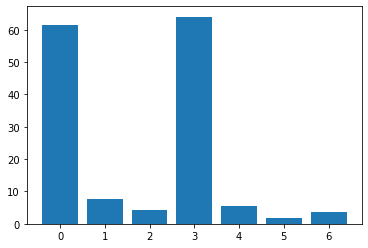

In [ ]:
from matplotlib import pyplot

importance_R = model_R.coef_
# summarize feature importance
for i,v in zip(features, importance_R):
  print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_R))], importance_R)
pyplot.show()

In [ ]:
from matplotlib import pyplot


Feature: author, Score: -2.50864
Feature: main_topic, Score: -0.46198
Feature: interest_age, Score: -0.33481
Feature: title, Score: -2.37902
Feature: publisher_cluster, Score: -0.29943
Feature: author_cluster, Score: -0.09359
Feature: number_pages, Score: -0.22529


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


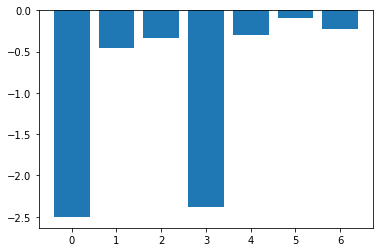

In [ ]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

features = ['author', 'main_topic', 'interest_age', 'title' , 'publisher_cluster', 'author_cluster', 'number_pages']
target = 'weight'

X = network_data[features].values.reshape(-1, len(features))
y = network_data[target].values

model_LR = LogisticRegression()
# fit the model
model_LR.fit(X, y)
# get importance
importance_LR = model_LR.coef_[0]
# summarize feature importance
for i,v in zip(features, importance_LR):
  print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_LR))], importance_LR)
pyplot.show()

In [ ]:
model_LR.intercept_

array([ 7.41797948,  4.40633358,  2.70291158,  1.72412967,  1.21974856,
        0.14291691, -0.27002786, -1.09150081, -1.46007841, -1.47841805,
       -1.2732649 , -1.13517619, -1.6367344 , -1.51032287, -1.52609203,
       -1.33331339, -1.43684929, -1.52539434, -1.30074225, -0.63610497])

In [ ]:
#How good was your model? You can evaluate your model performance in a form of R-squared
model_LR.score(X, y)

0.8514370476560245

Feature: author, Score: 0.10724
Feature: main_topic, Score: 0.12639
Feature: interest_age, Score: 0.04187
Feature: title, Score: 0.03276
Feature: publisher_cluster, Score: 0.01901
Feature: author_cluster, Score: 0.19801
Feature: number_pages, Score: 0.47472


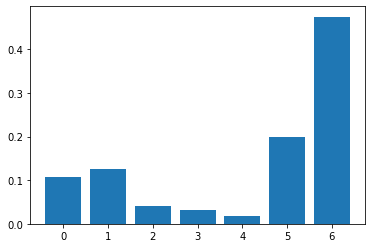

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# define dataset
features = ['author', 'main_topic', 'interest_age', 'title' , 'publisher_cluster', 'author_cluster', 'number_pages']
target = 'weight'

X = network_data[features].values.reshape(-1, len(features))
y = network_data[target].values
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(features, importance):
  print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Text(0, 0.5, 'Importance Score')

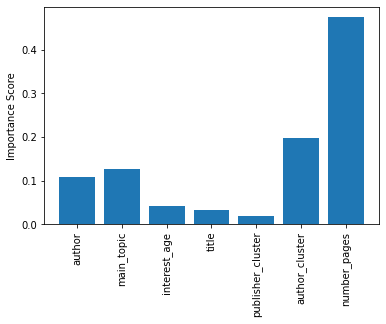

In [9]:
import numpy as np
import matplotlib.pyplot as plt

features = ['author', 'main_topic', 'interest_age', 'title' , 'publisher_cluster', 'author_cluster', 'number_pages']
y_pos = np.arange(len(features))
y = [0.10724, 0.12639, 0.04187, 0.03276, 0.01901, 0.19801, 0.47472]

#plt.figure(dpi=150)
plt.bar(y_pos, y)
plt.xticks(y_pos, features, rotation=90)
plt.ylabel('Importance Score')

In [ ]:
#How good was your model? You can evaluate your model performance in a form of R-squared
model.score(X, y)

0.7644300113068113

In [ ]:
!pip install xgboost
import xgboost

Feature: author, Score: 0.73014
Feature: main_topic, Score: 0.06083
Feature: interest_age, Score: 0.04442
Feature: title, Score: 0.04179
Feature: publisher_cluster, Score: 0.05525
Feature: author_cluster, Score: 0.03909
Feature: number_pages, Score: 0.02849


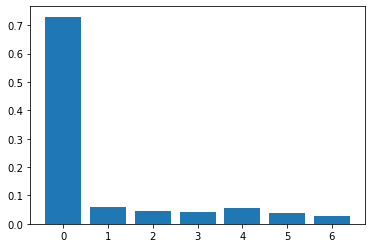

In [ ]:
from xgboost import XGBRegressor
from matplotlib import pyplot
# define dataset
features = ['author', 'main_topic', 'interest_age', 'title' , 'publisher_cluster', 'author_cluster', 'number_pages']
target = 'weight'

X = network_data[features].values.reshape(-1, len(features))
y = network_data[target].values
# define the model
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(features, importance):
  print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
#How good was your model? You can evaluate your model performance in a form of R-squared
model.score(X, y)

0.1798452545020528

In [ ]:
network_data.head()

,itemID_i,itemID_j,weight,language,author,main_topic,interest_age,title,publisher_cluster,author_cluster,number_pages
1,14576,4753,700,1.0,0.0,0.000000,0.975,0.0,1.000000,0.628093,0.819805
3,14576,6540,700,1.0,0.0,0.000000,0.975,0.0,0.761851,1.000000,0.688312
4,14576,72731,700,1.0,0.0,0.000000,0.975,0.0,0.761851,0.460938,0.146193
5,14576,24764,700,1.0,0.0,0.000000,0.975,0.0,1.000000,0.628093,0.636364
6,14576,32266,700,0.0,0.0,0.146498,0.975,0.0,0.000000,0.499543,0.366883


In [ ]:
limited_network = network_data.copy()

In [ ]:
limited_network = limited_network[limited_network['weight'] > 700]

In [ ]:
limited_network['weight'].value_counts()

800     26161
850      7716
880      3610
900      2020
920      1226
935       855
1000      705
950       566
960       418
970       299
975       260
980       168
987       152
990       140
984       139
993        90
997        80
995        78
999        72
Name: weight, dtype: int64

Feature: author, Score: 0.07388
Feature: main_topic, Score: 0.14972
Feature: interest_age, Score: 0.05607
Feature: title, Score: 0.04570
Feature: publisher_cluster, Score: 0.03030
Feature: author_cluster, Score: 0.21874
Feature: number_pages, Score: 0.42560


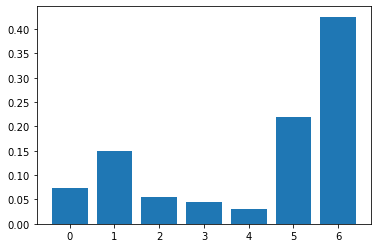

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# define dataset
features = ['author', 'main_topic', 'interest_age', 'title' , 'publisher_cluster', 'author_cluster', 'number_pages']
target = 'weight'

X = limited_network[features].values.reshape(-1, len(features))
y = limited_network[target].values
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(features, importance):
  print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## **Features' Correlation Matrix**

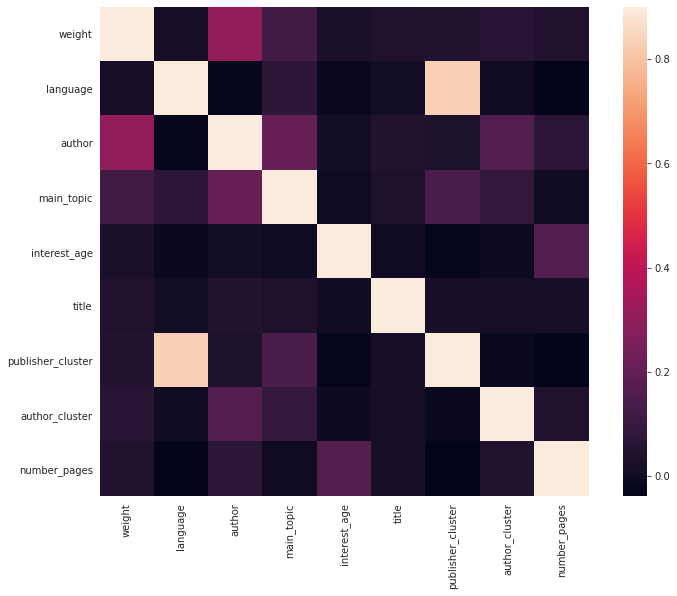

In [ ]:
#From the correlation matrix, author has higher correlation with weight which means
#items with same author are more often bought together
#Besides, lanaguge and publisher_cluster is highly correlated.
#It is because that we group publisher_cluster based on language first, 
#then gave five sub-cluster for each language

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

corr_network = network_data.copy()
corr_network = corr_network.drop(columns=['itemID_i', 'itemID_j'])

corrmat = corr_network.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## **Neural Network**

### **Use Network_data** (Mean Absoulute Error: 21.6 by 30 epochs) -> need to be trained on more epochs 
-> include all network data performs better in prediction

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
network_data.describe()

NameError: ignored

In [ ]:
def oneHotEncode(df,colNames):
    for col in colNames:
      #if( df[col].dtype == np.dtype('object')):
        dummies = pd.get_dummies(df[col],prefix=col)
        df = pd.concat([df,dummies],axis=1)

        #drop the encoded column
        df.drop([col],axis = 1 , inplace=True)
    return df

In [ ]:
#convert categorical feature into one hot encoding variable
network_data['author'] = network_data['author'].astype(int)
#network_data['language'] = network_data['language'].astype(int)

print('There were {} columns before encoding categorical features'.format(network_data.shape[1]))
network_data = oneHotEncode(network_data, ['author'])
print('There are {} columns after encoding categorical features'.format(network_data.shape[1]))

In [ ]:
network_data.head()

In [ ]:
random_seed = 46
np.random.seed(random_seed)

target = network_data['weight']
X = network_data.copy()
X = X.drop(columns=['itemID_i', 'itemID_j', 'weight'])

print(X.shape)
X.head()

In [ ]:
#Prepare training and testing data

from sklearn.model_selection import train_test_split

# ratio for training and test data split
ratio_test = 0.2
# define random seed to get same result for the training and test data
data_train, data_test, target_train, target_test = train_test_split(X, target, test_size=ratio_test, random_state=random_seed, shuffle=True)
#data_val, data_test, target_val, target_test = train_test_split(data_test, target_test, test_size=0.5, random_state=random_seed, shuffle=True)

# Check splits
print('Train size: {}'.format(len(target_train)))
print('Test size: {}'.format(len(target_test)))
#print('Validation size: {}'.format(len(target_val)))

**Build the Neural Network Model Architecture**

In [ ]:
#model
NN_model = Sequential()
#input layer
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = data_train.shape[1], activation='relu'))

#hidden layers
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

#output layer
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [ ]:
#compile the network
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
#define a checkpoint callback
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

**Model Training**

In [ ]:
NN_model.fit(data_train, target_train, epochs=30, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

In [ ]:
# Load wights file of the best model :
# weights_file = 'Weights-023--20.77628.hdf5' # choose the best checkpoint Weights-085--0.42944.hdf5
NN_model.load_weights(weights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

**Model Prediction**

In [ ]:
ypred = NN_model.predict(data_test)

In [ ]:
print("MAE: %.4f" % mean_absolute_error(target_test, ypred))

In [ ]:
#compare the difference of the actual value and the predicted value for testing dataset
from matplotlib.pyplot import figure

x_ax = range(len(ypred))
figure(figsize=(20, 10), dpi=80)
plt.scatter(x_ax, target_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.2, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
import statistics

print('Prediction mean: ', ypred.mean())
print('Max Prediction: ', ypred.max())
print('Min Prediction: ', ypred.min())

#print the boxplot for the prediction ypred
plt.boxplot(ypred)

### **Use limited_network** (Mean Absoulute Error: 37 by 30 epochs) -> need to be trained on more epochs

In [ ]:
limited_network.describe()

In [ ]:
#convert categorical feature into one hot encoding variable
limited_network['author'] = limited_network['author'].astype(int)
#network_data['language'] = network_data['language'].astype(int)

print('There were {} columns before encoding categorical features'.format(limited_network.shape[1]))
limited_network = oneHotEncode(limited_network, ['author'])
print('There are {} columns after encoding categorical features'.format(limited_network.shape[1]))
limited_network.head()

In [ ]:
random_seed = 46
np.random.seed(random_seed)

target = limited_network['weight']
X = limited_network.copy()
X = X.drop(columns=['itemID_i', 'itemID_j', 'weight'])

print(X.shape)
X.head()

In [ ]:
#Prepare training and testing data

from sklearn.model_selection import train_test_split

# ratio for training and test data split
ratio_test = 0.2
# define random seed to get same result for the training and test data
data_train, data_test, target_train, target_test = train_test_split(X, target, test_size=ratio_test, random_state=random_seed, shuffle=True)
#data_val, data_test, target_val, target_test = train_test_split(data_test, target_test, test_size=0.5, random_state=random_seed, shuffle=True)

# Check splits
print('Train size: {}'.format(len(target_train)))
print('Test size: {}'.format(len(target_test)))
#print('Validation size: {}'.format(len(target_val)))

In [ ]:
#model
NN_model = Sequential()
#input layer
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = data_train.shape[1], activation='relu'))

#hidden layers
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

#output layer
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [ ]:
#compile the network
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
#define a checkpoint callback
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(data_train, target_train, epochs=30, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

In [ ]:
# Load wights file of the best model :
# weights_file = 'Weights-024--35.87862.hdf5' # choose the best checkpoint Weights-085--0.42944.hdf5
NN_model.load_weights(weights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
ypred = NN_model.predict(data_test)

In [ ]:
print("MAE: %.4f" % mean_absolute_error(target_test, ypred))

In [ ]:
#compare the difference of the actual value and the predicted value for testing dataset
from matplotlib.pyplot import figure

x_ax = range(len(ypred))
figure(figsize=(20, 10), dpi=80)
plt.scatter(x_ax, target_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.2, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
import statistics

print('Prediction mean: ', ypred.mean())
print('Max Prediction: ', ypred.max())
print('Min Prediction: ', ypred.min())

#print the boxplot for the prediction ypred
plt.boxplot(ypred)